In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
data = pd.read_csv('./Data/Fremont_Bridge_Bicycle_Counter.csv',index_col='Date',parse_dates=True)
data['Time'] = data.index.time
data['Day'] = data.index.date
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk,Time,Day
Date,,,,,
2012-10-03 00:00:00,13.0,4.0,9.0,00:00:00,2012-10-03
2012-10-03 01:00:00,10.0,4.0,6.0,01:00:00,2012-10-03
2012-10-03 02:00:00,2.0,1.0,1.0,02:00:00,2012-10-03
2012-10-03 03:00:00,5.0,2.0,3.0,03:00:00,2012-10-03
2012-10-03 04:00:00,7.0,6.0,1.0,04:00:00,2012-10-03


In [3]:
data2 = data.iloc[:,[0,2]]
data2.columns = ['East','West']
data2.head()

,East,West
Date,,
2012-10-03 00:00:00,13.0,9.0
2012-10-03 01:00:00,10.0,6.0
2012-10-03 02:00:00,2.0,1.0
2012-10-03 03:00:00,5.0,3.0
2012-10-03 04:00:00,7.0,1.0


plt.style.use('seaborn')
data.resample('D').sum().plot(figsize=(20,10))
plt.show()

plt.style.use('seaborn')
ax = data2.resample('D').sum().rolling(365).sum().plot(figsize=(20,10))
plt.show()

/Users/pierrechazel/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


(0, 2045514.05)

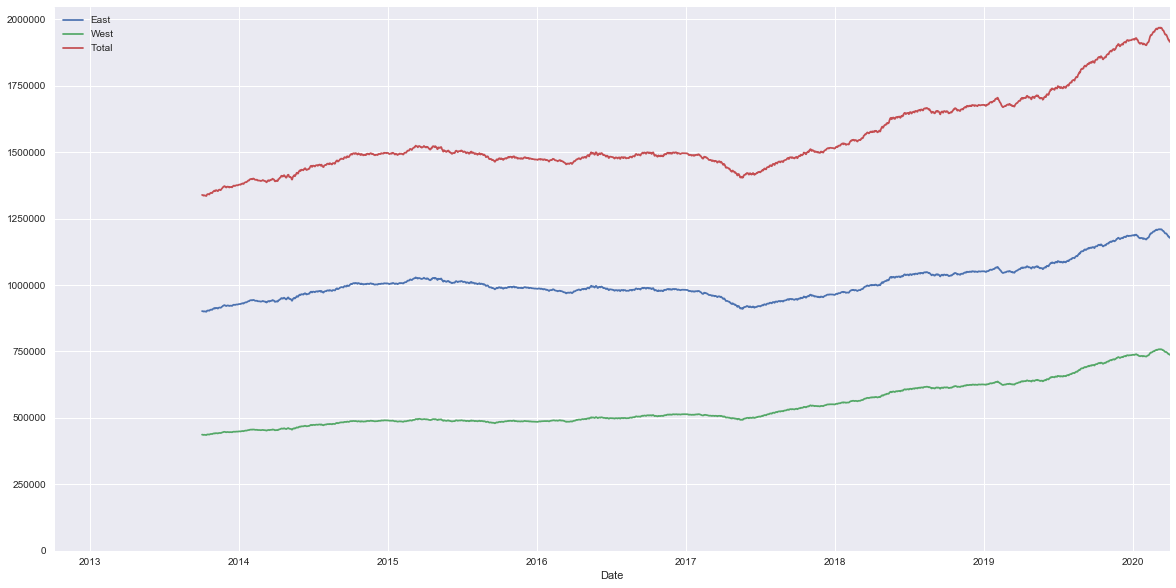

In [5]:
data2['Total'] = data2['West']+data2['East']
ax = data2.resample('D').sum().rolling(365).sum().plot(figsize=(20,10))
ax.set_ylim(0, None)
#plt.show()

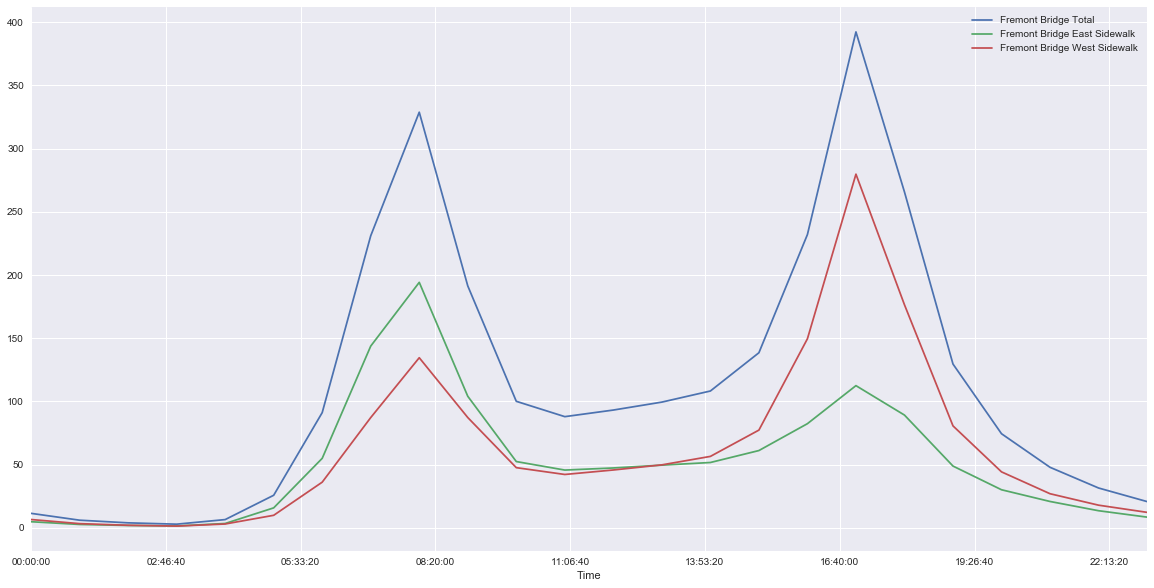

In [9]:
data.groupby('Time').mean().plot(figsize=(20,10))
plt.show()

In [51]:
pivoted = data.pivot('Time', 'Day','Fremont Bridge Total')
pivoted.head()

Day,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07,2012-10-08,2012-10-09,2012-10-10,2012-10-11,2012-10-12,...,2020-03-22,2020-03-23,2020-03-24,2020-03-25,2020-03-26,2020-03-27,2020-03-28,2020-03-29,2020-03-30,2020-03-31
Time,,,,,,,,,,,,,,,,,,,,,
00:00:00,13.0,18.0,11.0,15.0,11.0,9.0,12.0,15.0,21.0,17.0,...,5.0,3.0,3.0,2.0,1.0,2.0,6.0,2.0,1.0,1.0
01:00:00,10.0,3.0,8.0,15.0,17.0,4.0,3.0,3.0,10.0,13.0,...,2.0,2.0,1.0,3.0,2.0,2.0,1.0,0.0,1.0,0.0
02:00:00,2.0,9.0,7.0,9.0,3.0,5.0,4.0,3.0,13.0,5.0,...,3.0,0.0,1.0,1.0,4.0,3.0,4.0,2.0,0.0,1.0
03:00:00,5.0,3.0,4.0,3.0,6.0,5.0,8.0,4.0,2.0,7.0,...,1.0,2.0,0.0,2.0,4.0,0.0,3.0,1.0,0.0,1.0
04:00:00,7.0,8.0,9.0,5.0,3.0,5.0,9.0,5.0,12.0,5.0,...,0.0,2.0,3.0,3.0,6.0,3.0,1.0,2.0,2.0,4.0


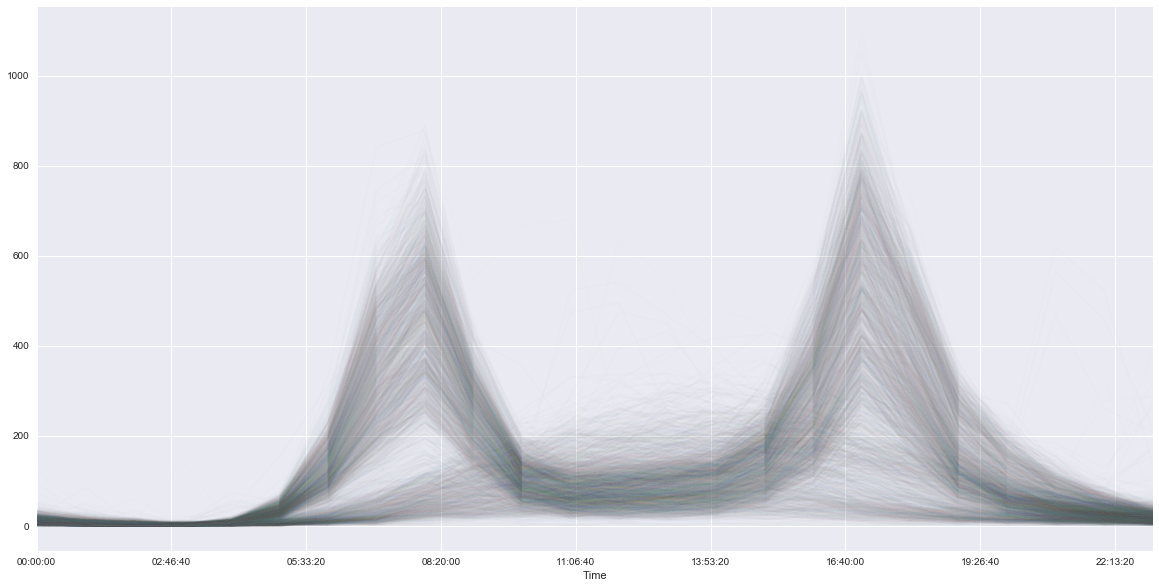

In [52]:
pivoted.plot(legend=False, figsize=(20,10), alpha=0.01)
plt.show()